In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics,preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.isnull().sum()#the dataset is clean

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
df.duplicated().sum()#there is duplication

3

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()#no duplication

0

In [7]:
#EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.describe(include=object)

,species
count,147
unique,3
top,versicolor
freq,50


In [11]:
#how many species are there?

In [12]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
num_of_species = df['species'].value_counts()
num_of_species = pd.DataFrame(num_of_species.reset_index())
num_of_species

,index,species
0,versicolor,50
1,virginica,49
2,setosa,48


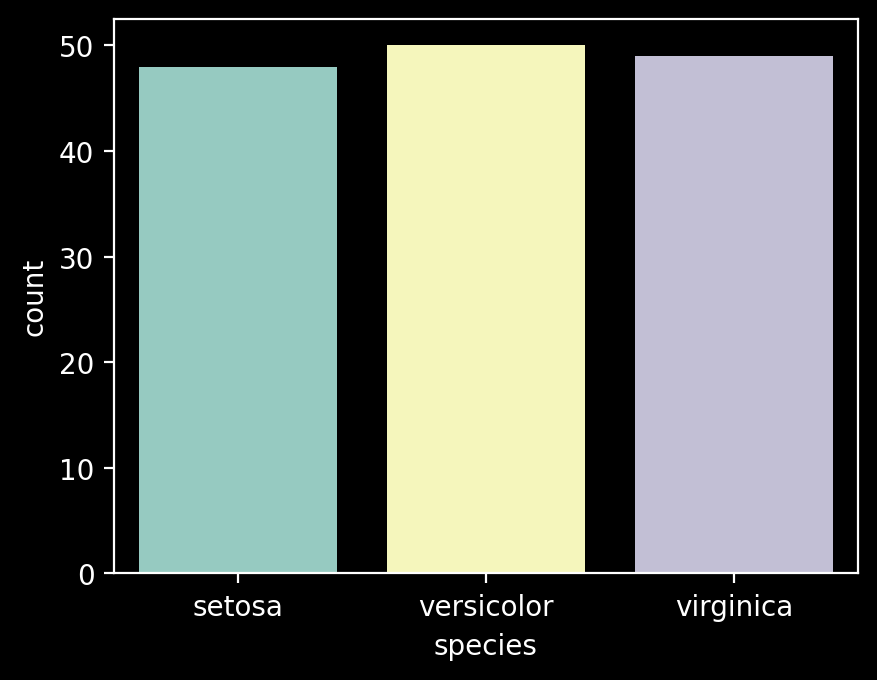

In [14]:
sns.countplot(data=df,x='species');

In [15]:
num_of_species = df['species'].value_counts(normalize=True)
num_of_species = pd.DataFrame(num_of_species.reset_index())
num_of_species

,index,species
0,versicolor,0.340136
1,virginica,0.333333
2,setosa,0.326531


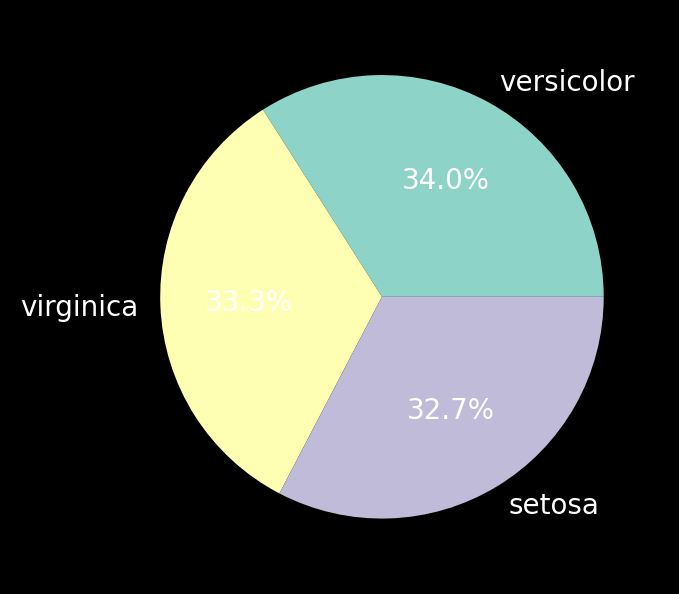

In [16]:
plt.pie(num_of_species['species'],labels=num_of_species['index'],autopct='%1.1f%%');

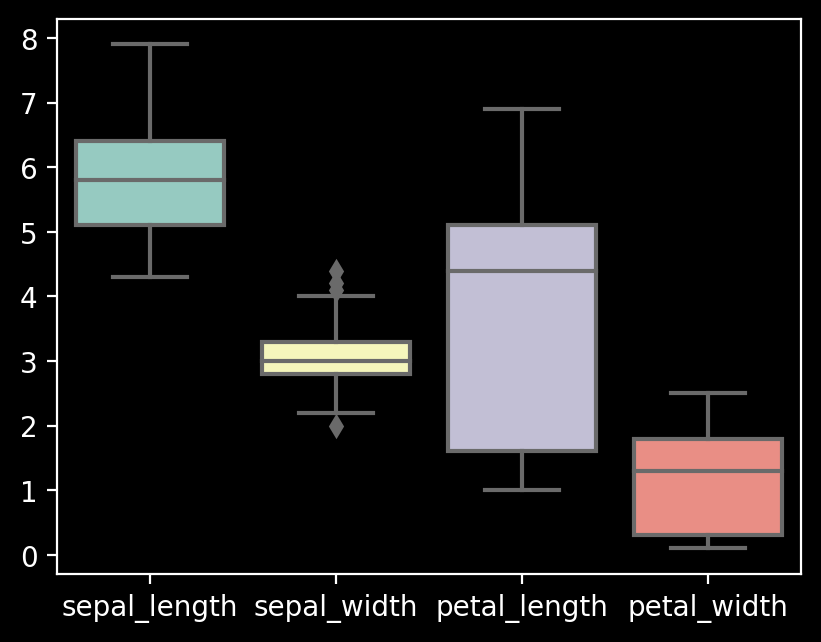

In [17]:
sns.boxplot(data=df);

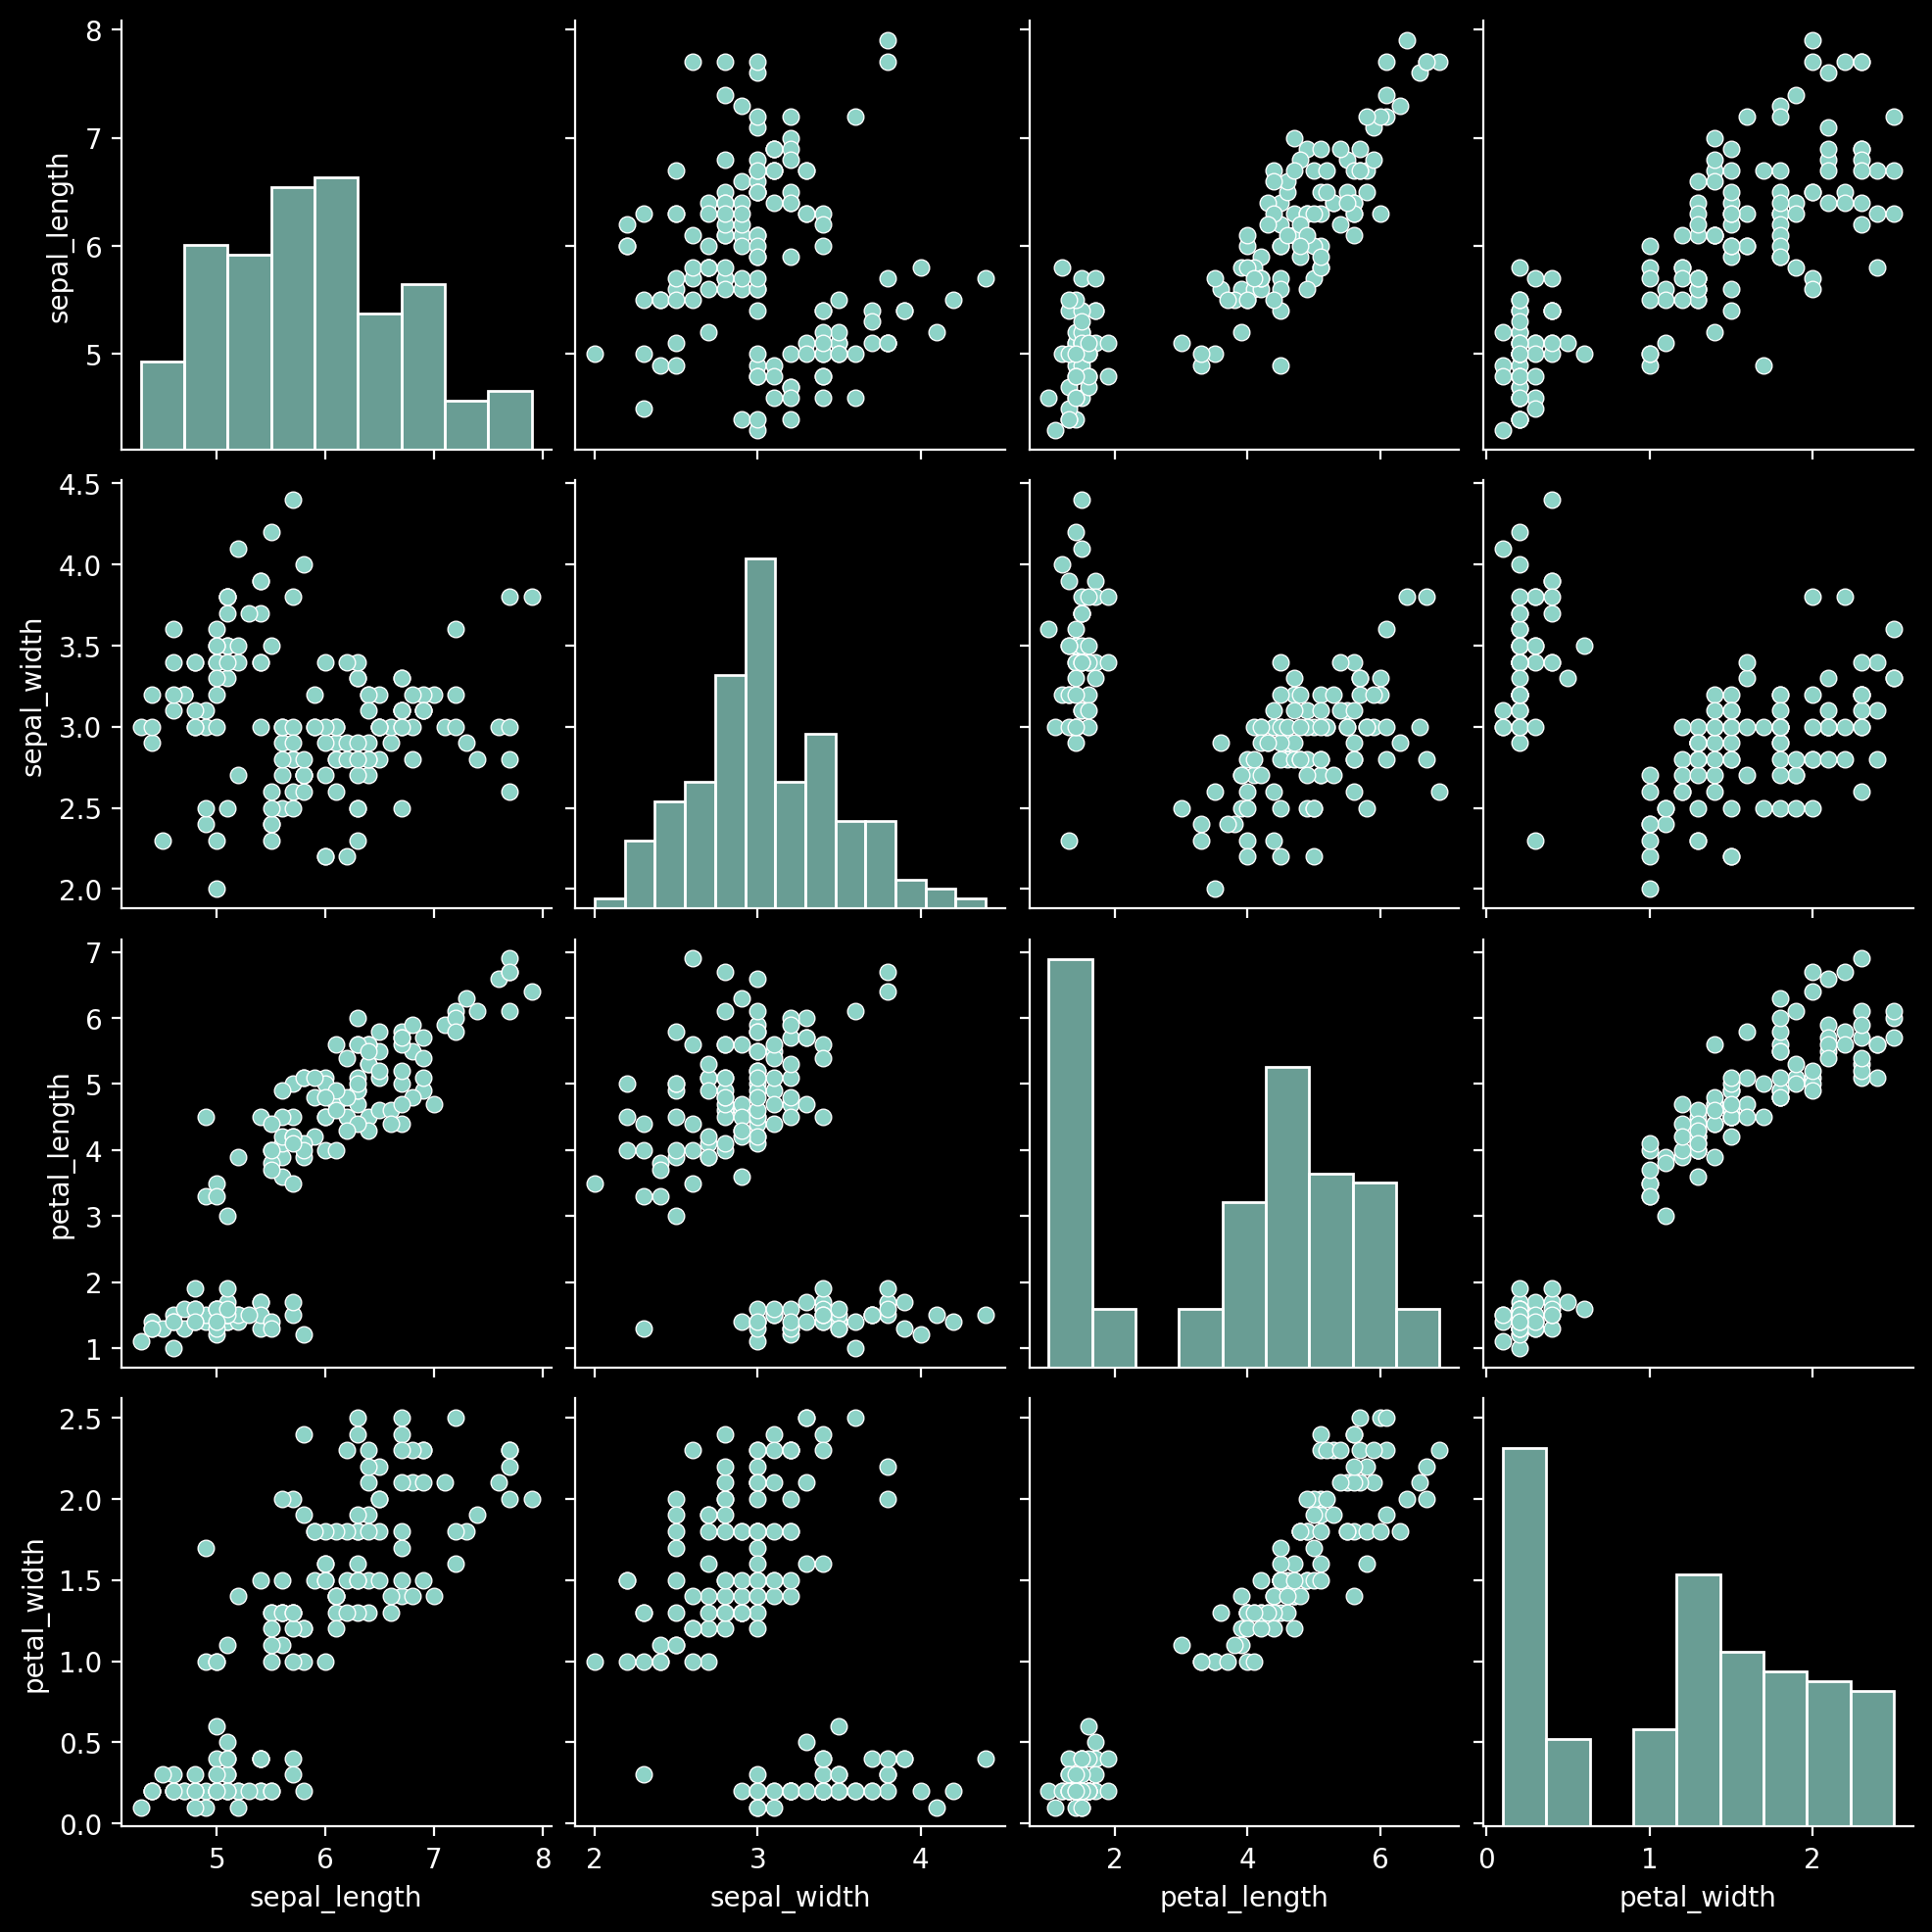

In [18]:
sns.pairplot(data=df);

<ipython-input-19-db93604bff16>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True);


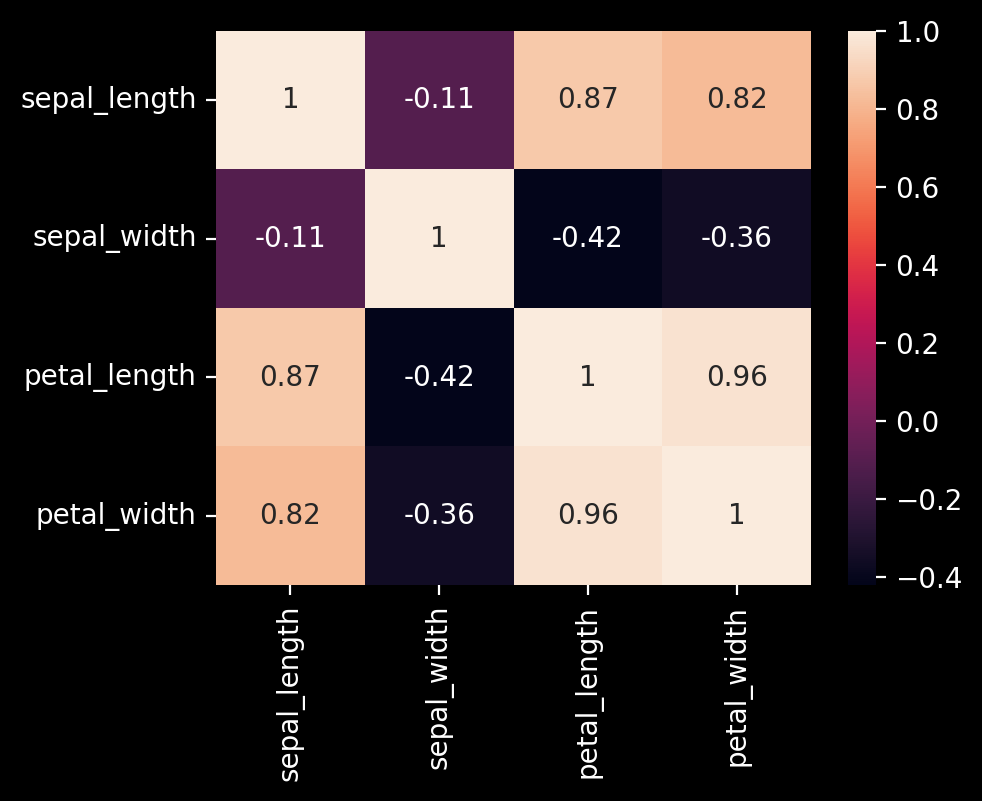

In [19]:
sns.heatmap(df.corr(),annot=True);

In [20]:
#training and testing

In [21]:
x = df.drop('species',axis=1)
y = df['species']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

In [23]:
x_train.shape

(117, 4)

In [24]:
x_test.shape

(30, 4)

In [25]:
y_train.shape

(117,)

In [26]:
y_test.shape

(30,)

In [27]:
#Models Training

In [28]:
models = {'LR':LogisticRegression(),'KN':KNeighborsClassifier(),'RF':RandomForestClassifier(),'GBR':GradientBoostingClassifier(),'SVM':SVC()}

In [29]:
def ModelsTraining(models):
    for name,model in models.items():
        print('===========================')
        print('model: ',name)
        model.fit(x_train,y_train)
        predictions = model.predict(x_test)
        predictions = pd.DataFrame(predictions,columns=['predictions'])
        predictions['Actual'] = np.array(y_test)
        print('\n',predictions)
        print('\n','R^2:',model.score(x_test,y_test))
        print('\n',metrics.classification_report(y_test,predictions['predictions']))
        print('===========================')

In [30]:
ModelsTraining(models)

model:  LR

    predictions      Actual
0   versicolor  versicolor
1    virginica   virginica
2    virginica   virginica
3       setosa      setosa
4    virginica   virginica
5    virginica   virginica
6    virginica   virginica
7       setosa      setosa
8       setosa      setosa
9    virginica   virginica
10  versicolor  versicolor
11  versicolor  versicolor
12      setosa      setosa
13      setosa      setosa
14  versicolor  versicolor
15      setosa      setosa
16  versicolor  versicolor
17      setosa      setosa
18  versicolor  versicolor
19   virginica  versicolor
20  versicolor  versicolor
21      setosa      setosa
22      setosa      setosa
23      setosa      setosa
24      setosa      setosa
25   virginica   virginica
26   virginica   virginica
27      setosa      setosa
28   virginica   virginica
29      setosa      setosa

 R^2: 0.9666666666666667

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor 

In [31]:
#as we can see the KN model has 100% score

In [32]:
KN_model = models['KN']
KN_model

KNeighborsClassifier()